## Performance metrics

When we are teaching and evaluating supervised models, we are trying to teach it to predict as well as possible. To do that, we need some metrics to evaluate this - i.e. we need to give a numeric value to the goodness of the model performance in order to say which model performs best. The algoritms are designed to find the parameters that will lead to the highest possible metric value using the train and test sets.

For this purpose, there are a number of metrics, and it is important to understand their differences in order to select the one that fits your purpose. It may also be a good idea to use more than one metric.

### Regression

Regression model performance is evaluated through the difference between the real value and the predicted value - the smaller the difference, the better the model. This is exactly the same as we do when computing the best fit for a linear model for example. 

The most popular regression model performance metrics are
- Mean Squared Error (MSE): The average of the squared difference between the real value and the predicted value.
- Root Mean Squared Error (RMSE): Root of the MSE. It's in the same unit as the original variable and therefore easier to interpret. 
- Mean Absolute Error (MAE): The average of the absolute error (i.e. all errors computed as positive values, regardless of whether the prediction is too small or too big).
- R^2: Total variance explained by the model divided by the total variance.

MSE and RMSE penalize large errors more severely than smaller ones, i.e. an error of 10 is worse than two errors of 5. MEA penalizes all errors relative to their magnitude.R^2 is not considered as a true error metric, as it does not look at the predicted vs. real values, but it is also often used as one.

You can read more [here](https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914). 

### Classification
To understand the performance metrics, let's first consider a binary classification case (we want to predict a yes/no answer, such as "is this a potential flying squirrel habitat?"). In this case, there are four possible outcomes: We classify a real positive value to be positive; we classify the real positive value to be negative; we classify the real negative value to be negative, or we classify the real negative value to be positive. 

- The values that are predicted as positive and are actually positive are *true positives*.
- The values that are predicted as positive but are actually negative are *false positives*.
- The values that are predicted as begative and are actually negative are *true negatives*.
- The values that are predicted as negative but are actually positive are *false negatives*. 

In this terminology, positive/negative refers to the classifier result (*what we think*), and true/false to whether that was correct or not.

By calculating ratios between these four classes, we get the different performance metrics. 
- Precision: What proportion of the positives given by our model are actually positives? 
- Recall (also called sensitivity or true positive rate): What proportion of the real positives are correctly clasified as positive?
- Specificity (or true negative rate): What propostion of the real negatives are correctly classified as negative?
- Accuracy: What proportion of all values are classified correctly?


<img src="img/TP-TN-FP-FN-1.png"/>

There are a number or other metrics, such as **F1 score** or **F measure**, which seeks to find balance between precision and recall. It is computed as (2 * Precision * Recall) / (Precision + Recall). The F1 score is popular for imbalanced data sets. If the model gives a score or probability of class memebership, and different cut-off points can be defined (e.g. do we call this positive if there's a 50 % probability for it to be positive, or only after 70 %?), ROC curves can be used to evaluate the performance and seek the best cutoff point. If you wish, you can read more about performance metrics [here](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226) and [here](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/).

The correct performance metric depends on the purpose of the model. Often more important than overall accuracy is to catch all positives even if we get a higher number of false positives as a side effect. For example, we want to be sure that we have identified all meadows that may host an endangered species, so we can protect them - we don't mind terribly if we protect some other meadows as well. In other cases, it may be essential to avoid false negatives: when we are classifying mushrooms to edible and non-edible (poisonous), we want to be very sure not to classify a non-edible mushroom as edible even if that means that some edible ones are erroneously classified as non-edible. In these cases, recall and specificity may be much better metrics than precision or accuracy.

The distribution of positives and negatives also needs to be taken into account when selecting the performance measure. For example, if the positive and negative cases are very imbalanced, for example only 5 % of the studied habitats are suitable for the flying squirrel, we would reach 95 % accuracy simply by predicting that all habitats are unsuitable - we would be right 95 % of the time only because of the data distribution! In this case, recall might be a much better metric.

It's important to notice that - depending on the data and the classifier model - there is only a certain accuracy that can be reached. Some observations will be misclassified. However we can build a model that optimizes the performance metrics that is important to us, e.g. in the case of the edible mushroom example, the high true negative rate (non-edible mushrooms are classified as non-edible with high reliability). This usually means that we will also get more false negatives, i.e. edible mushrooms classified as non-edible. The desired balance between the different types of errors depends on the purpose of the model.

Multi-class classifier performance metrics are usually variants of these binary metrics.




## Exercise: 


Please do the following tasks and answer the questions below:
* Compute MSE, RMSE, MAE and R^2 for all the regression models on validation and training data set of the water temperature data. How much do the errors differ for the different models and what does this difference mean? It might be usefult to make a new method(s) for computing these metrics 

* Compute precision, recall, specifity and accuracy for the mammographic data on all models for both train and validation data. What do you think about the results?
* Go back to Lesson-3.ipynb and change the parameters of the random forest model. How do different parameters affect the model performance? 
* Take a  look at the documentation of different models  used previously here.See:
    * https://scikit-learn.org/stable/modules/linear_model.html
    * https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    * https://scikit-learn.org/stable/modules/ensemble.html


In [1]:
# No need to add/alter code here, do it in Lesson-3.ipynb :)

# Further reading


## Neural networks and deep learning

Artificial neural networks (ANN or NN) are a fast-developing, flexible machine learning method family. They consist of units called artificial neurons, and links (edges) between these units. The neurons are typically adjusted in layers: an input layer, an output layer, and one or more hidden layers. The neurons are linked to each other, receive input and produce output that is passed on to other neurons. 

<img src="img/Colored_neural_network.svg">
Figure by Glosser.ca - Own work, Derivative of File:Artificial neural network.svg, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=24913461

A neuron's *activation function* determines its output based on the inputs it receives. There are a number of different activation functions with different mathematical properties, but the important thing to realize is that nonlinear activation fuctions (such as the logistic (sigmoid) function) allow the ANN to learn nonlinear responses.

There are also many different ANN architectures, i.e. ways that the neurons are connected to each other. The figure above describes the simplest, "basic" ANN. Recurrent neural networks (RNN) are suited for the analysis of text, audio, and time series, as they perform time steps and therefore can capture seqential information in the data. Convolutional neural networks (CNN), on the other hand, are highly useful for image analysis, since they capture spatial features (such as the positions of eyes, mouth, and nose in a portrait) from an image.

Deep learning or deep neural networks (DNN) is basically a neural networks with multiple layers. There is no clear definition for deep learning, but DNNs can be, for example, large RNNs and CNNs. DNNs are powerful with large data sets, and excel with data that are not in the form of classical data tables, but e.g. images, text documents, or audio.

ANNs are often complex and it is impossible to diagnose how they come to the conclusion they do (remember, for example, the tree-based classification in which it was easy to see how the conclusions are drawn). This means that if the data is biased, the model result may be biased and there's no way to see this has happened. For example, if the cat images often have a brown background and dog images green background, the algorithm may learn to classify the backgrouds and not the animal species.

### How to do it in practice:
scikit-learn also has neural network models, which we demonstrate here. However, there also are dedicated deep learning modules for python such as [TensorFlow](https://www.tensorflow.org/), [Keras](https://keras.io) and [PyTorch](https://pytorch.org/). These libraries have advanced features for (fast) GPU computing. Also, these libraries have additional features related to workflow and visualization of predictions and layers, such as [TensorBoard](https://www.tensorflow.org/tensorboard)

In [2]:
import numpy as np # numpy comes from "numeric python" and it is a very popular library for numerical operations
import pandas as pd # pandas provides more advanced data structures and methods for manipulating data
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt # a widely used visualiation library
import cartopy.crs as ccrs # a geographic stuffwhich we use for plotting
import cartopy
import json
import os
import requests # for querying the data from internet
import io # for io operations
import urllib # for building the query string
import urllib.parse # --||--
import seaborn as sns

import plotting_utils # A self made "plotting library" to hide the less important parts of code

import sklearn #               sklearn is a good library for doing basic machine learning, 
import sklearn.preprocessing # in addition to that, it contains some neat preprocessing stuff
import sklearn.linear_model
import sklearn.ensemble
import sklearn.cluster
import sklearn.datasets
import sklearn.decomposition
from sklearn.neural_network import MLPRegressor

import pickle # for storing files and variables

In [3]:
with open('datasets/water_quality.pkl', 'rb') as handle:
    data_dict_water_quality = pickle.load(handle)
data_dict_water_quality['features'] = ['LATITUDE', 'LONGITUDE', 'OBSDEP', 'YEAR', 'SINMONTHFRACTION', 
                                       'COSMONTHFRACTION', 'SINTIMEOFDAYFRACTION', 'COSTIMEOFDAYFRACTION']
data_dict_water_quality['target'] = 'TEMP' 

##### First we unpack the data from the dictionaries

In [4]:
# Unpack the variables from the dictionaries
data_frame_numeric = data_dict_water_quality['data_frame_numeric']
normalizer = data_dict_water_quality['normalizer']
features_normalizer = data_dict_water_quality['normalized_columns']
features_regression = data_dict_water_quality['features']
feature_target = data_dict_water_quality['target']

data_frame_normalized = data_frame_numeric.copy()
data_frame_normalized[features_normalizer] = normalizer.transform(data_frame_numeric[features_normalizer])

# Put the data to matrices to be understandable by the algorithms:
X = data_frame_normalized[features_regression].values
y = data_frame_normalized[[feature_target]].values.reshape((-1,1))

#### Then we split the data to train and validation data at random (See lecture 2 for details)

In [5]:
indices = np.random.permutation(X.shape[0])
train_indices = indices[:int(X.shape[0]*0.8)]
validation_indices = indices[int(X.shape[0]*0.8):]
X_train, y_train = X[train_indices,:], y[train_indices,:]
X_validation, y_validation = X[validation_indices,:], y[validation_indices,:]

#### Then we fit the regression model to the training data

In [6]:
reg = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(10,5,5), activation='relu', 
                                          solver='adam',early_stopping=True, 
                                          validation_fraction=0.2, n_iter_no_change=10)


reg.fit(X_train, y_train)

# Predict the outcomes for the validation data
y_pred = reg.predict(X_validation).reshape(-1)

# Print the goodness of the fit (score) of the model fit  
print(reg.score(X_validation, y_validation))

d:\programfiles\anaconda3\envs\mldemo\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8449187155699258


#### We then visualize the predictions on the validation data in comparison to the actual measurements to see where the model fails

d:\programfiles\anaconda3\envs\mldemo\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


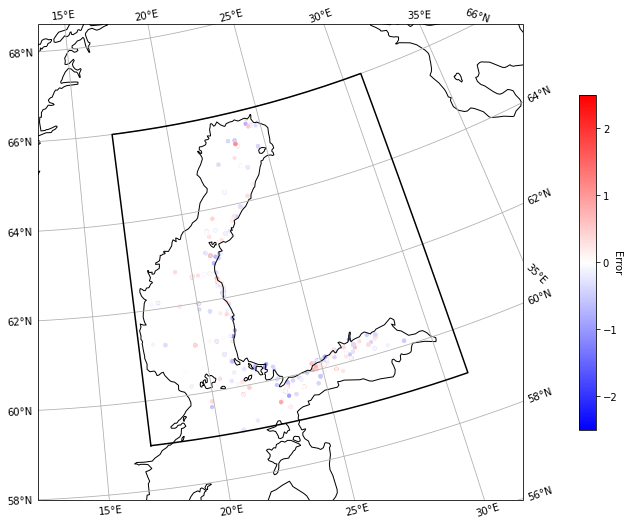

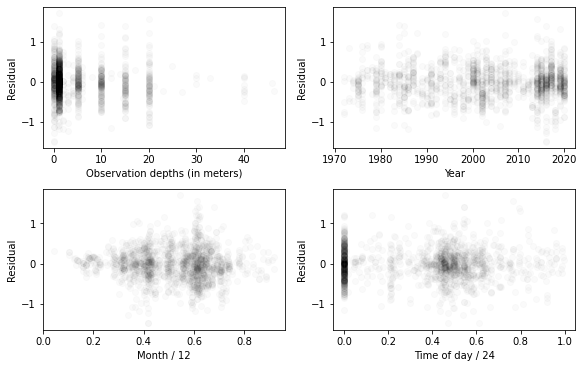

In [7]:
bounding_box = [17.0, 59.0, 31.0, 66.0] # From Lesson-1
plotting_utils.scatterplot_in_map(data_frame_numeric.iloc[validation_indices]['LONGITUDE'], 
                                  data_frame_numeric.iloc[validation_indices]['LATITUDE'], 
                                  bounding_box=bounding_box, 
                                  bounding_box_context=plotting_utils.BOUNDS_NORTHERN_BALTIC_SEA,
                                  c=y_pred-y_validation.reshape(-1),cmap='bwr', s=10, 
                                  vmin=-2.5, vmax=2.5, stock_img=False)
cbar = plt.colorbar(fraction=0.03, pad=0.1)
cbar.set_label('Error', rotation=270)


data_ = data_frame_numeric.iloc[validation_indices]
data_['res'] = y_pred - y_validation.reshape(-1)
plotting_utils.plot_scatter(data_,
                            columns_x=[('OBSDEP', "Observation depths (in meters)"),
                                       ('YEAR', "Year"),
                                       ('MONTHFRACTION', "Month / 12"),
                                       ('TIMEOFDAYFRACTION', "Time of day / 24")], 
                            columns_y=[('res','Residual')], 
                            c='k', alpha=0.02, ncols=2)

#### Finally we visualize the predictive behaviour of the model by setting the data to its median and making predictions with respect to one feature at a time

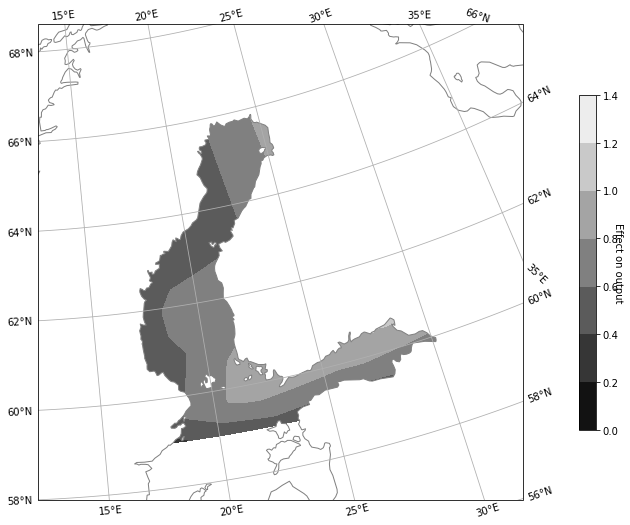

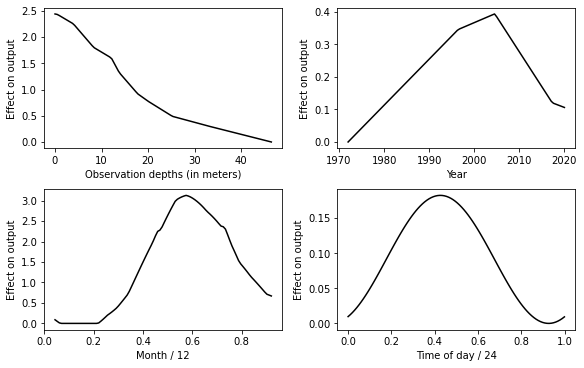

In [8]:
plotting_utils.plot_effects(data_frame_numeric.iloc[validation_indices], 
                            reg, features_regression,
                            normalizer, features_normalizer, 
                            plotted_columns=[('OBSDEP', "Observation depths (in meters)"),
                                             ('YEAR', "Year"),
                                             ('MONTHFRACTION', "Month / 12"),
                                             ('TIMEOFDAYFRACTION', "Time of day / 24")],
                            periodic_columns=['MONTHFRACTION', 'TIMEOFDAYFRACTION'], ncols=2,
                            coordinates=['LATITUDE', 'LONGITUDE'], bounding_box=bounding_box)

* How can you interpret model performance? 
* Do the results look reasonable? 
* How does the medol perform in comparison to the previously introduced models?

## How to handle uncertainty: Bayesian machine learning

Classical ML methods tend to give their predictions without indicating how certain or uncertain the answers may be - the habitat is classified as suitable or non-suitable. You have probably noticed that the classification output is usually squeeshed to a float between 0 (non-suitable) and 1 (suitable), much like a probability. In some cases it is possible to interpret this as a probability for suitability.

### Mathematical foundations (You can skip this if you want...)
The aim of Bayesian machine learning is exactly this, to interpret the uncertainty in the algorithm output (and parameters) with probability distributions. Let us think of linear model:

$y = a x + b + \epsilon, \;\text{where}\; \epsilon \sim Normal(\epsilon \;|\; 0, \sigma)$

Here we have the made the following assumpions:
* Our model is fully defined by model parameters $\theta = [a, b, \sigma]$
* Given a input location $x$, $y$

Mathematically, in Bayesian machine learning we have following;
* Model parameters $\theta$ have a prior distribution $p(\theta)$ 
    * A prior belief for the parameters of the model, e.g. $p(\theta) = Normal(\theta \;|\; \mu, \Sigma)$
    * e.g. $\theta = [a, b, \sigma]$ in linear model
* Likelihood $p(y \; | \; x, \theta)$ 
    * our model assumpion on how the output depends on the input and model parameters).
    * e.g. $p(y \; | \; x, \theta) = Normal(y \;|\; ax +b, \sigma)$ for linear model 
* We are then interested in computing the posterior distribution of the model parameters $p(\theta \; | \; x, y)$
    * Using Bayes' theorem: $p(\theta \; | \; x, y) = \frac{p(y \; | \; x, \theta) p(\theta)}{ \int p(y \; | \; x, \theta) p(\theta) \text{d} \theta }$ 


Computing the posterior distribution is often impossible in closed form and has to be approximated e.g. using Monte carlo sampling. However, it is very useful as we can predict the outputs $y^*$ at yet unseen locations $x^*$ with it:

$p(y^* \; | \; x^*, y, x, \theta) = \int p(y^* \; | \; x^*, \theta)  p(\theta \; | \; x, y)  \text{d} \theta$

### When to use Bayesian machine learning?

The above explanation was probably too mathematical, but remember the following:
- Bayesian machine learning is useful when there is only little data available and you want to make the best of it
    - Bayesian machine learning methods often have better performance for smaller datasets
- Bayesian machine learning is useful when you arenot only interested in your prediction but also on the uncertainty of your prediction
- Bayesian machine learning is computationally expensive

### Where to learn more:
We don't cover Bayesian machine learning more on this course, as it is a fairly complex topic on its own. If the above mathematical explanation was too mathematical (as it probably was, sorry), you can read e.g. 
* [https://opendatascience.com/how-bayesian-machine-learning-works/](https://opendatascience.com/how-bayesian-machine-learning-works/)
* [https://algorithmia.com/blog/bayesian-machine-learning](https://algorithmia.com/blog/bayesian-machine-learning)
* [https://machinelearningmastery.com/bayes-theorem-for-machine-learning/](https://machinelearningmastery.com/bayes-theorem-for-machine-learning/)
